In [5]:
#Import dependencies into juputer notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error 

import pickle

In [6]:
#Import dataset with Gerogia real estate and view table

df = pd.read_csv('RealEstate_Georgia.csv')
df.head()

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,0,31503-110785431,16,17,55064,USA,2021-07-12,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Brantley County
1,1,31503-76611082,16,18,55064,USA,2021-07-12,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Ware County
2,2,31503-93126153,16,19,55064,USA,2021-07-10,0,0,Listed for sale,...,1,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Ware County
3,3,31503-110785598,16,20,55064,USA,2021-07-09,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Brantley County
4,4,31503-2101070583,16,21,55064,USA,2021-07-06,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Ware County


In [7]:
#Analysis and cleaning of Numerical Data
#View datatypes in table for EDA, cleaning, and to see numerical data to be used

df.dtypes[df.dtypes!='object']

Unnamed: 0              int64
stateId                 int64
countyId                int64
cityId                  int64
is_bankOwned            int64
is_forAuction           int64
time                  float64
price                 float64
pricePerSquareFoot    float64
yearBuilt               int64
zipcode               float64
longitude             float64
latitude              float64
hasBadGeocode           int64
livingArea            float64
livingAreaValue       float64
bathrooms             float64
bedrooms              float64
buildingArea          float64
parking                 int64
garageSpaces          float64
hasGarage               int64
pool                    int64
spa                     int64
isNewConstruction       int64
hasPetsAllowed          int64
dtype: object

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'stateId'}>,
        <AxesSubplot:title={'center':'countyId'}>,
        <AxesSubplot:title={'center':'cityId'}>,
        <AxesSubplot:title={'center':'is_bankOwned'}>],
       [<AxesSubplot:title={'center':'is_forAuction'}>,
        <AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'pricePerSquareFoot'}>,
        <AxesSubplot:title={'center':'yearBuilt'}>],
       [<AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'hasBadGeocode'}>,
        <AxesSubplot:title={'center':'livingArea'}>],
       [<AxesSubplot:title={'center':'livingAreaValue'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'buildingArea'}

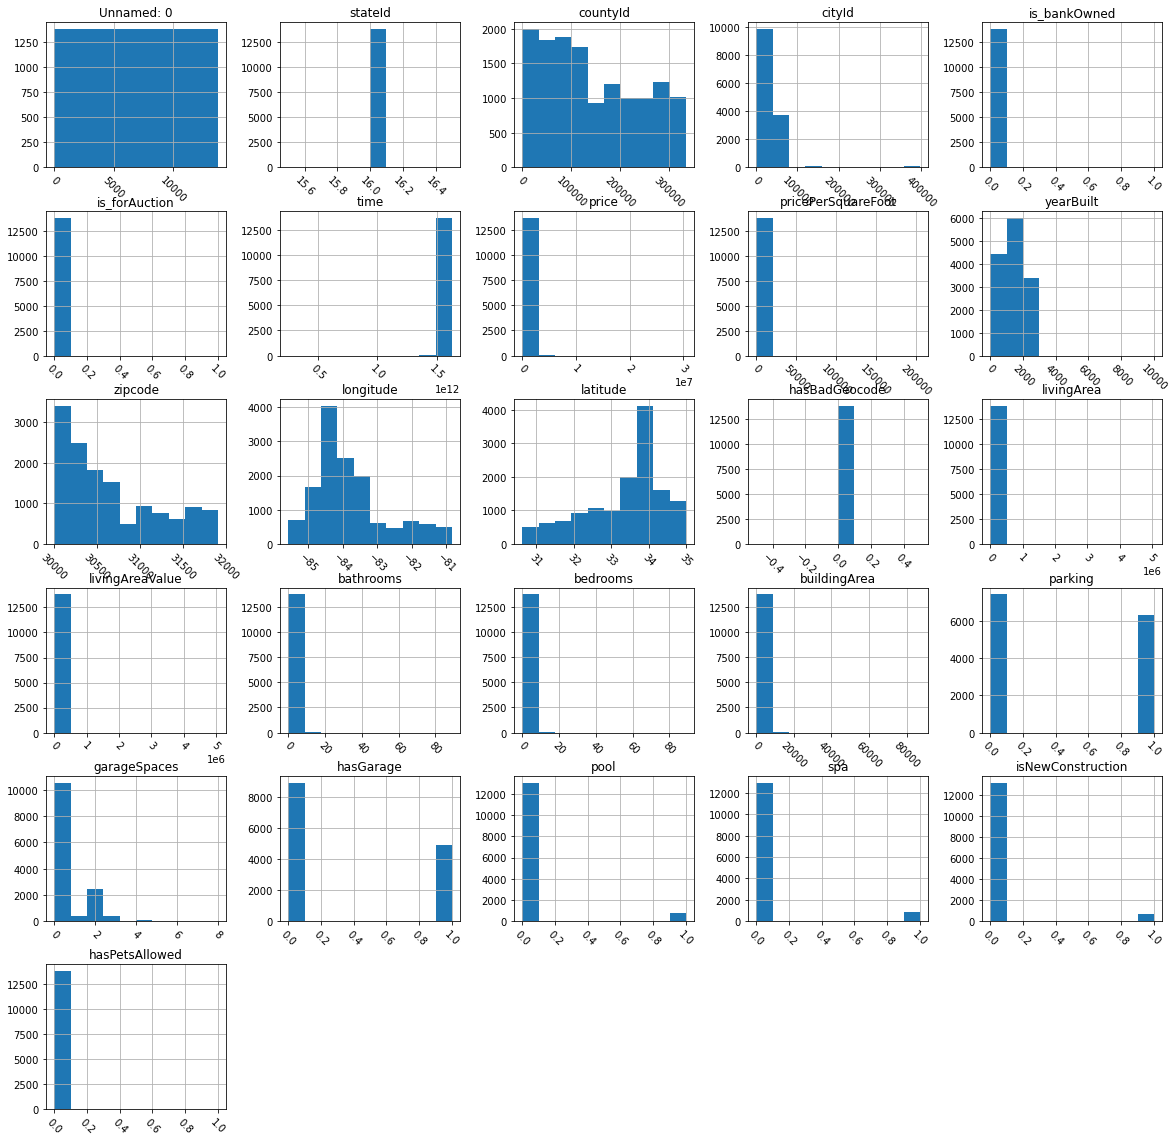

In [13]:
# Histograms showing numerical data from graph and to determine distribution (skew) of target variable

df.hist(figsize=(20,20), xrot=-45)

<AxesSubplot:xlabel='countyId'>

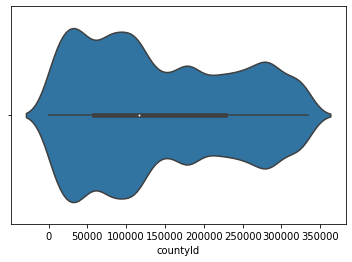

In [8]:
# Based on the above histograms the countyID has a right-tailed distribution which is also seen in the violin plot
sns.violinplot(data=df, x='countyId')

In [21]:
df.drop_duplicates()
df_cln = df.loc[(df.is_bankOwned == False) & (df.is_forAuction == False)& (df.homeType != 'LOT')]

In [23]:
#Cleaning Data

drop_columns = ['Unnamed: 0', 'id', 'stateId', 'countyId', 'cityId', 'country',
       'is_bankOwned', 'is_forAuction', 'longitude', 'latitude', 'event', 'time','state',
       'streetAddress', 'hasBadGeocode',
       'description', 'currency', 'livingAreaValue',
       'lotAreaUnits', 'buildingArea', 
       'garageSpaces', 'hasPetsAllowed']
df_ready = df_cln.drop(columns=drop_columns).dropna()
df_ready

,datePostedString,price,pricePerSquareFoot,city,yearBuilt,zipcode,livingArea,bathrooms,bedrooms,parking,hasGarage,levels,pool,spa,isNewConstruction,homeType,county
0,2021-07-12,169900.0,74.0,Waycross,1985,31503.0,2302.0,3.0,4.0,0,0,0,0,0,0,SINGLE_FAMILY,Brantley County
1,2021-07-12,159000.0,56.0,Waycross,1910,31503.0,2864.0,2.0,4.0,0,0,0,0,0,0,SINGLE_FAMILY,Ware County
2,2021-07-10,45000.0,62.0,Waycross,1945,31503.0,728.0,1.0,1.0,1,0,0,0,0,0,SINGLE_FAMILY,Ware County
3,2021-07-09,165000.0,102.0,Waycross,1971,31503.0,1620.0,2.0,2.0,0,0,0,0,0,0,SINGLE_FAMILY,Brantley County
5,2021-07-05,173500.0,115.0,Waycross,1980,31503.0,1512.0,2.0,3.0,0,0,0,0,0,0,SINGLE_FAMILY,Ware County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13784,2021-07-05,100000.0,93.0,Oxford,1986,30054.0,1081.0,2.0,3.0,1,0,One,0,0,0,SINGLE_FAMILY,Newton County
13787,2021-07-02,254900.0,156.0,Oxford,1978,30054.0,1632.0,2.0,3.0,0,0,One,1,0,0,SINGLE_FAMILY,Walton County
13801,2021-06-18,350000.0,131.0,Oxford,2002,30054.0,2665.0,4.0,5.0,1,1,Two,0,0,0,SINGLE_FAMILY,Newton County
13802,2021-06-18,379000.0,193.0,Oxford,2000,30054.0,1960.0,3.0,3.0,1,1,One,1,1,0,SINGLE_FAMILY,Newton County


In [16]:
#Median price of home across counties

df.countyId.median()

116674.5

<AxesSubplot:xlabel='price'>

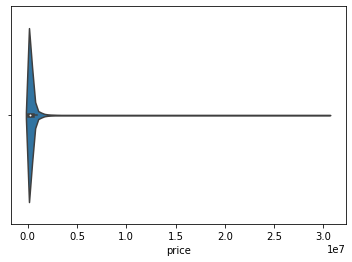

In [17]:
# Using the violin plot for the price of houses. 

sns.violinplot(data=df, x='price')

In [18]:
#Median price value of homes. 

df.price.median()

#Based on information from attomdata (https://attomdata.com) The U.S. median home price increased 6.2 percent in 2019, hitting an all-time high of $258,000. The annual home-price appreciation in 2019 topped the 4.5 percent rise in 2018 compared to 2017, but was down from the 7.1 percent increase in 2017 compared to 2016.
#Hence,the houses amassed in this REIT portfolio appears to be a bit more downtown on average.

247000.0

In [20]:
#Checking for missing Values. Since time has 19 missing values but it is not being used in predictions, no further need to convert NaN to 0 aligorithms. 
df.select_dtypes(exclude=['object']).isnull().sum()

Unnamed: 0             0
stateId                0
countyId               0
cityId                 0
is_bankOwned           0
is_forAuction          0
time                  19
price                  0
pricePerSquareFoot     0
yearBuilt              0
zipcode                0
longitude              0
latitude               0
hasBadGeocode          0
livingArea             0
livingAreaValue        0
bathrooms              0
bedrooms               0
buildingArea           0
parking                0
garageSpaces           0
hasGarage              0
pool                   0
spa                    0
isNewConstruction      0
hasPetsAllowed         0
dtype: int64

In [21]:
#Checking for outliers. Based on the histograms, the city ID indicates possible outliers. 

df.cityId.sort_values(ascending=False)

#Based on the results,there are a few cities with prices at 397383, approximately 150,000 above the mean price. This may not be considered an outlier.

6791    397383
815     397383
6797    397383
8024    397383
8028    397383
         ...  
3881         0
3880         0
3878         0
3877         0
7159         0
Name: cityId, Length: 13804, dtype: int64

C:\Users\sps9\AppData\Local\Temp/ipykernel_25860/3922457981.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


<AxesSubplot:>

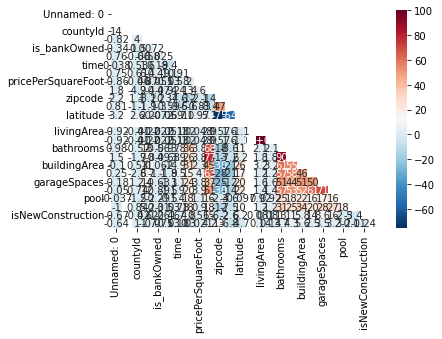

In [38]:
# Creation of correlation heat map for numerical values.
# mask out upper triangle

# mask out upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# heatmap
sb.heatmap(df.corr()*100, 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask)

In [39]:
#Analysis and cleaning of Categorical Data
#EDA for categorical data

df.dtypes[df.dtypes=='object']

id                  object
country             object
datePostedString    object
event               object
city                object
state               object
streetAddress       object
description         object
currency            object
lotAreaUnits        object
levels              object
homeType            object
county              object
dtype: object

In [41]:
df.homeType.value_counts()

SINGLE_FAMILY    8111
LOT              4529
TOWNHOUSE         474
CONDO             428
MULTI_FAMILY      262
Name: homeType, dtype: int64